In [1]:
# importing libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as nb
import datetime
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'D:\Data\time_series.csv' , encoding = 'utf-8')

## let's getting familiar with our Data

In [3]:
df.head()

,Date,store,product,number_sold
0,2010-01-01,0,0,801
1,2010-01-02,0,0,810
2,2010-01-03,0,0,818
3,2010-01-04,0,0,796
4,2010-01-05,0,0,808


In [4]:
df.tail()

,Date,store,product,number_sold
230085,2018-12-27,6,9,890
230086,2018-12-28,6,9,892
230087,2018-12-29,6,9,895
230088,2018-12-30,6,9,899
230089,2018-12-31,6,9,912


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230090 entries, 0 to 230089
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Date         230090 non-null  object
 1   store        230090 non-null  int64 
 2   product      230090 non-null  int64 
 3   number_sold  230090 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.0+ MB


# No Nulls and our Date feature is object so we have to convert it

In [6]:
# convert date from object type to datetime
df['Date']= pd.to_datetime(df['Date'])

In [7]:
df['Month'] = df['Date'].dt.strftime('%m/%Y')
df['Year'] = df['Date'].dt.strftime('%Y')

In [8]:
df.head()

,Date,store,product,number_sold,Month,Year
0,2010-01-01,0,0,801,01/2010,2010
1,2010-01-02,0,0,810,01/2010,2010
2,2010-01-03,0,0,818,01/2010,2010
3,2010-01-04,0,0,796,01/2010,2010
4,2010-01-05,0,0,808,01/2010,2010


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230090 entries, 0 to 230089
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Date         230090 non-null  datetime64[ns]
 1   store        230090 non-null  int64         
 2   product      230090 non-null  int64         
 3   number_sold  230090 non-null  int64         
 4   Month        230090 non-null  object        
 5   Year         230090 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 10.5+ MB


In [10]:
df['Month'] = pd.to_datetime(df['Month'])
df['Year']= pd.to_datetime(df['Year'])

In [11]:
df[['product']].value_counts()

product
0          23009
1          23009
2          23009
3          23009
4          23009
5          23009
6          23009
7          23009
8          23009
9          23009
dtype: int64

In [12]:
df[['store']].value_counts()

store
0        32870
1        32870
2        32870
3        32870
4        32870
5        32870
6        32870
dtype: int64

## checking data stationarity

In [23]:
# grouping our data by months
sales_by_month = df.groupby('Month')['number_sold'].sum().reset_index()
sales_by_month = sales_by_month.set_index('Month')
print(sales_by_month)

            number_sold
Month                  
2010-01-01      1698403
2010-02-01      1529750
2010-03-01      1688388
2010-04-01      1630998
2010-05-01      1685240
...                 ...
2018-08-01      1709901
2018-09-01      1660685
2018-10-01      1717400
2018-11-01      1663840
2018-12-01      1716870

[108 rows x 1 columns]


<Axes: xlabel='Month'>

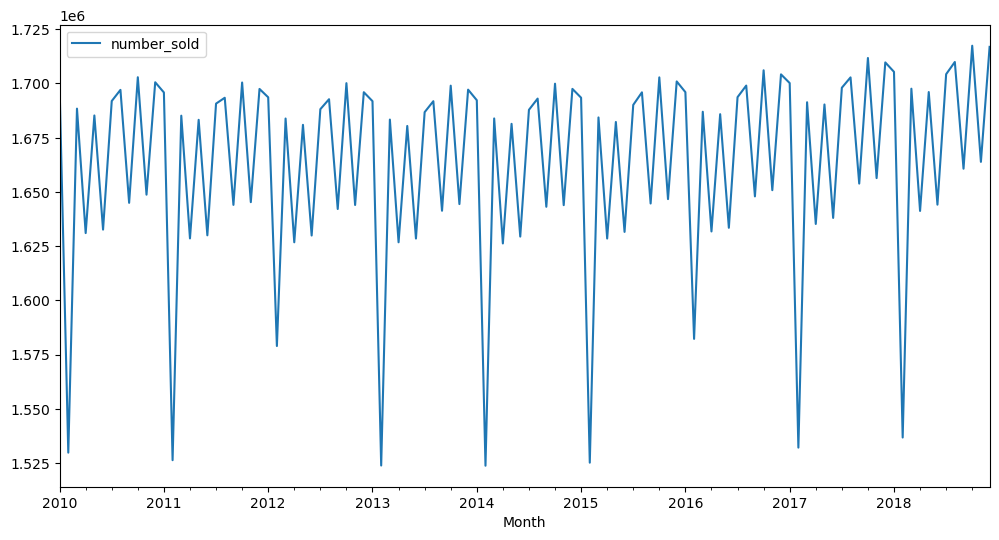

In [24]:
sales_by_month.plot(kind='line', figsize=(12, 6))

In [15]:
sales_by_year = df.groupby('Year')['number_sold'].sum()

<Axes: xlabel='Year'>

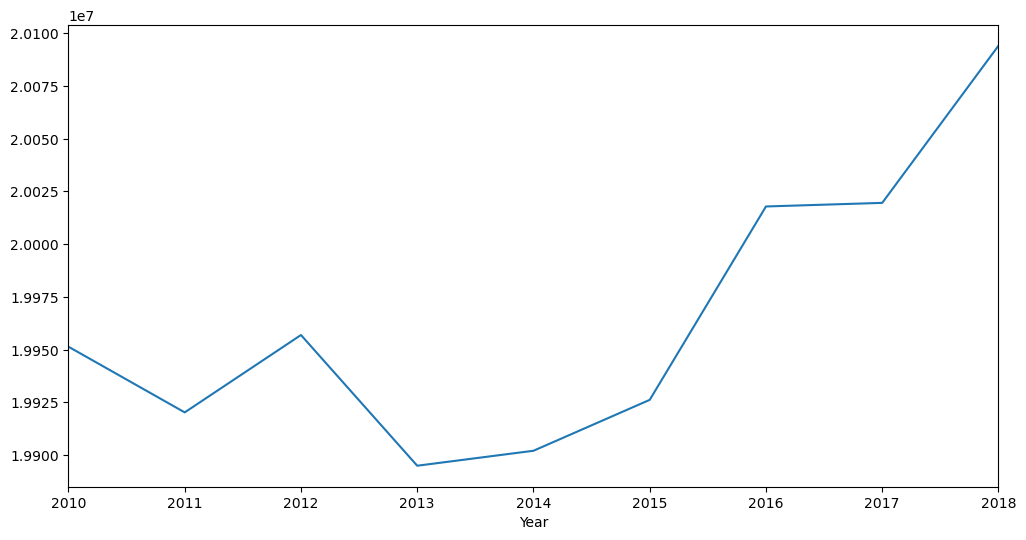

In [16]:
sales_by_year.plot(kind='line', figsize=(12, 6))

### our data isn't stationary and there is a trend over the years

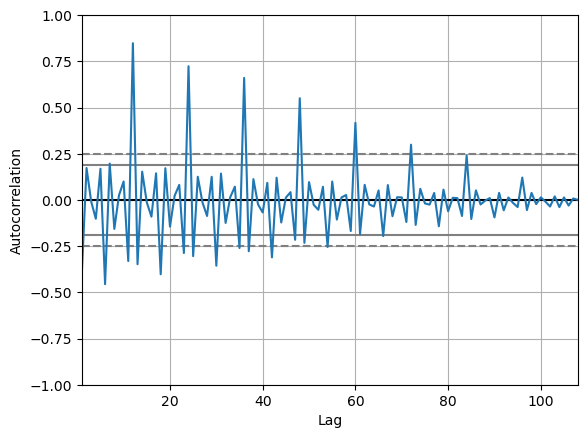

In [17]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(sales_by_month)
plt.show()

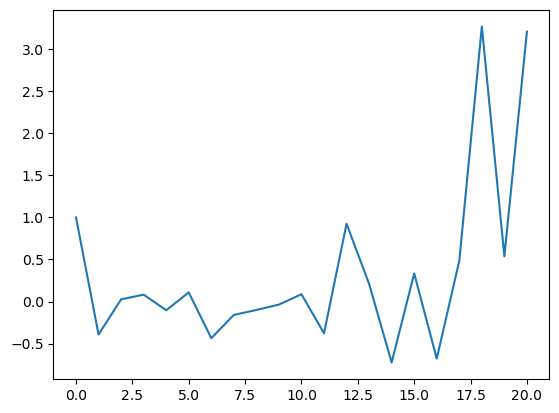

In [18]:
# importing partial autocorrelation
from statsmodels.tsa.stattools import pacf
pacf_coefficients = pacf(sales_by_month)
plt.plot(pacf_coefficients)

## My data isn't stationary and ACF , PACF changed Quickly so i will use ARIMA

In [19]:
# importing ARIMA model
from statsmodels.tsa.arima.model import ARIMA


In [28]:
#  Create an ARIMA model object
arima = ARIMA(sales_by_month['number_sold'], order=(3, 0, 5))

# Fit the model to the data
arima_fit = arima.fit()
arima_fit

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [37]:
# Prepare the data for forecasting
future_dates = pd.date_range(start='2018-12-01', end='2018-12-31', freq='M')

forecast = arima_fit.predict(start=future_dates[0], end=future_dates[-1])

forecast

2019-01-01    1.669493e+06
Freq: MS, dtype: float64